In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from common import helpers
from scipy.fft import rfft, rfftfreq


# Load the data
iterator = helpers.load_evts_from_file(input("Enter file path: "))
df = helpers.evts_to_df(iterator)

# Convert to datetime and set index
df['t'] = pd.to_datetime(df['t'], unit='us', origin='unix')
df.set_index('t', inplace=True)
# Filter data by polarity
positive = df[df['p'] == 1]
negative = df[df['p'] == 0]

# Resample and count events in each bin
resample_frequency = '100us'  # Resampling every millisecond; adjust this as needed
negative_counts = negative.resample(resample_frequency).size()
yf = rfft(negative_counts)
xf = rfftfreq(len(negative_counts), pd.Timedelta(resample_frequency).total_seconds())

# # Get the index where frequency is greater than 10 Hz
# idx = np.where(xf > 10)[0]

# # Slice the frequency and amplitude arrays to ignore frequencies below 10 Hz
# xf = xf[idx]
# yf = yf[idx]


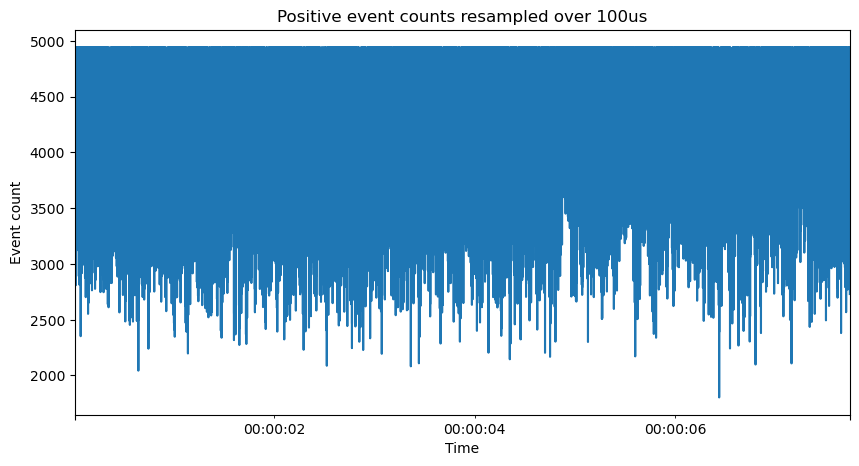

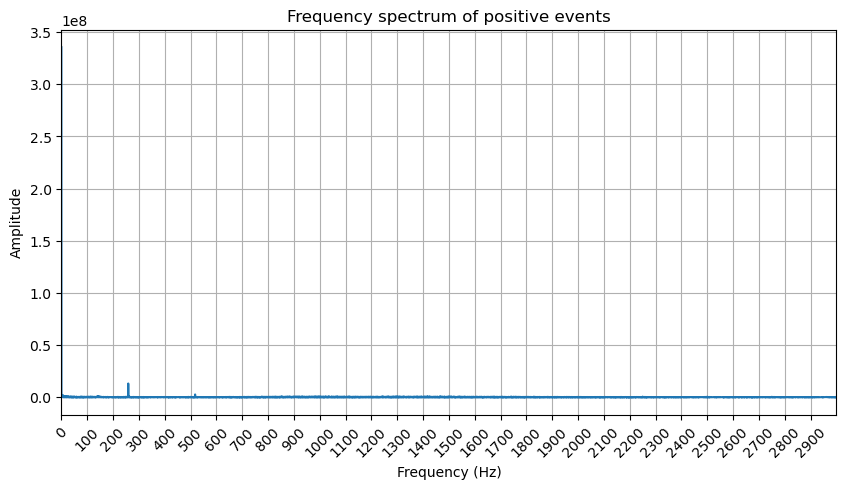

In [3]:
# Plot the resampled event counts
plt.figure(figsize=(10, 5))
negative_counts.plot(title='Positive event counts resampled over ' + resample_frequency)
plt.xlabel('Time')
plt.ylabel('Event count')
plt.show()

# Plot the Fourier transform results
plt.figure(figsize=(10, 5))
#plt.loglog(xf, np.abs(yf))
plt.plot(xf, np.abs(yf))
plt.title('Frequency spectrum of positive events')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xticks(np.arange(0, 3e3, 100), rotation=45)
plt.xlim(0,3e3)

plt.grid(True)
plt.show()